In [1]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
#Loading Dataset
data = pd.read_csv("MSFT_daily_EWMA.csv")
data["timestamp"] = pd.to_datetime(data["timestamp"]).dt.date
data = data.set_index("timestamp")
data

,close,8EWMA,20EWMA,Signal,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns
timestamp,,,,,,,,,,,
2017-06-02,71.76,71.760000,71.760000,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN
2017-06-05,72.28,72.052500,72.033000,1.0,20.0,20.0,1445.6,8554.4,10000.0,NaN,NaN
2017-06-06,72.52,72.248705,72.211823,1.0,20.0,0.0,1450.4,8554.4,10004.8,0.00048,0.00048
2017-06-07,72.39,72.298226,72.263260,1.0,20.0,0.0,1447.8,8554.4,10002.2,-0.00026,0.00022
2017-06-08,71.95,72.190054,72.187485,1.0,20.0,0.0,1439.0,8554.4,9993.4,-0.00088,-0.00066
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-25,262.52,260.173906,266.336119,0.0,0.0,0.0,0.0,11246.8,11246.8,0.00000,0.12468
2022-05-26,265.90,261.446371,266.294584,0.0,0.0,0.0,0.0,11246.8,11246.8,0.00000,0.12468
2022-05-27,273.24,264.067178,266.956052,0.0,0.0,0.0,0.0,11246.8,11246.8,0.00000,0.12468


In [ ]:
#Generating Matrix of Features
X = data[["8EWMA", "20EWMA"]]
X = X.drop(X.index[1258])
X

,8EWMA,20EWMA
timestamp,,
2017-06-02,71.760000,71.760000
2017-06-05,72.052500,72.033000
2017-06-06,72.248705,72.211823
2017-06-07,72.298226,72.263260
2017-06-08,72.190054,72.187485
...,...,...
2022-05-24,259.503593,266.737816
2022-05-25,260.173906,266.336119
2022-05-26,261.446371,266.294584


In [ ]:
#Generating Dependent Variable Vectors
y = data[["Signal"]].shift(1)
y = y.dropna()
y

,Signal
timestamp,
2017-06-05,0.0
2017-06-06,1.0
2017-06-07,1.0
2017-06-08,1.0
2017-06-09,1.0
...,...
2022-05-25,0.0
2022-05-26,0.0
2022-05-27,0.0


In [ ]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
#Initialising ANN
ann = tf.keras.models.Sequential()

In [ ]:
 #Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=100,activation="sigmoid"))

In [ ]:
 #Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=50,activation="sigmoid"))

In [ ]:
 #Adding Third Hidden Layer
ann.add(tf.keras.layers.Dense(units=40,activation="tanh"))

In [ ]:
 #Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [ ]:
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
#Fitting ANN
ann.fit(X_train_scaled,y_train,batch_size=32,epochs = 500)

Epoch 1/500
32/32 [==============================] - 1s 1ms/step - loss: 0.7028 - accuracy: 0.6431
Epoch 2/500
32/32 [==============================] - 0s 2ms/step - loss: 0.5890 - accuracy: 0.7217
Epoch 3/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5877 - accuracy: 0.7217
Epoch 4/500
32/32 [==============================] - 0s 2ms/step - loss: 0.5876 - accuracy: 0.7217
Epoch 5/500
32/32 [==============================] - 0s 1ms/step - loss: 0.5895 - accuracy: 0.7217
Epoch 6/500
32/32 [==============================] - 0s 4ms/step - loss: 0.5794 - accuracy: 0.7217
Epoch 7/500
32/32 [==============================] - 0s 2ms/step - loss: 0.5811 - accuracy: 0.7217
Epoch 8/500
32/32 [==============================] - 0s 2ms/step - loss: 0.5826 - accuracy: 0.7217
Epoch 9/500
32/32 [==============================] - 0s 4ms/step - loss: 0.5781 - accuracy: 0.7217
Epoch 10/500
32/32 [==============================] - 0s 2ms/step - loss: 0.5802 - accuracy: 0.7217
Epoch 11/

In [ ]:
ann_loss, ann_accuracy = ann.evaluate(X_test_scaled, y_test, verbose=2)


8/8 - 0s - loss: 0.3184 - accuracy: 0.8810 - 286ms/epoch - 36ms/step


In [ ]:
# Making predictions using the testing data
predictions = ann.predict(X_test_scaled)
predictions

array([[9.9817622e-01],
       [1.0000000e+00],
       [9.9994105e-01],
       [8.1797993e-01],
       [9.5713580e-01],
       [9.9948025e-01],
       [8.7059677e-01],
       [9.9999934e-01],
       [9.8900068e-01],
       [9.9999321e-01],
       [1.0000000e+00],
       [9.9999940e-01],
       [9.9999952e-01],
       [9.8162925e-01],
       [1.0000000e+00],
       [9.9985909e-01],
       [1.0000000e+00],
       [9.9989814e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [4.4442612e-07],
       [1.0000000e+00],
       [9.9711925e-01],
       [9.8491693e-01],
       [9.9999726e-01],
       [5.2583051e-01],
       [7.1567023e-01],
       [9.9396342e-01],
       [9.9975312e-01],
       [1.0000000e+00],
       [9.9999428e-01],
       [1.1262435e-04],
       [9.9782872e-01],
       [9.9951804e-01],
       [2.1883845e-04],
       [9.9996912e-01],
       [9.9999952e-01],
       [4.3122076e-05],
       [1.0000000e+00],
       [1.1594936e-01],
       [9.994959

<AxesSubplot:ylabel='Frequency'>

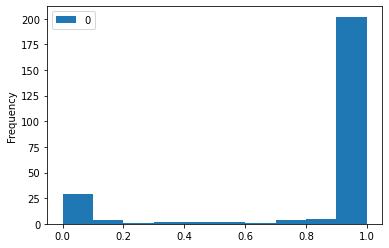

In [ ]:
predictions_df = pd.DataFrame(predictions)

predictions_df.plot.hist()

In [ ]:
predictions = (ann.predict(X_test_scaled)> 0.5).astype("int32")
predictions

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)


In [ ]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,38,30
Actual 1,0,184


Accuracy Score : 0.8809523809523809
Classification Report
              precision    recall  f1-score   support

         0.0       1.00      0.56      0.72        68
         1.0       0.86      1.00      0.92       184

    accuracy                           0.88       252
   macro avg       0.93      0.78      0.82       252
weighted avg       0.90      0.88      0.87       252



In [ ]:
#Saving created neural network
#ann.save("ANN.h5")

# Results
## with 500 epochs, 11.67% loss and 92.86% accuracy 


In [ ]:
#Loading Dataset
data_tsla = pd.read_csv("TSLA_daily_EWMA.csv")
data_tsla

,timestamp,close,8EWMA,20EWMA,Signal,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns
0,2017-06-02 04:00:00+00:00,339.85,339.850000,339.850000,0.0,0.0,NaN,0.00,NaN,NaN,NaN,NaN
1,2017-06-05 04:00:00+00:00,347.32,344.051875,343.771750,1.0,431.0,431.0,149694.92,305.08,150000.00,NaN,NaN
2,2017-06-06 04:00:00+00:00,352.85,347.744352,347.105229,1.0,431.0,0.0,152078.35,305.08,152383.43,0.015890,0.015890
3,2017-06-07 04:00:00+00:00,359.65,351.917053,350.726710,1.0,431.0,0.0,155009.15,305.08,155314.23,0.019233,0.035428
4,2017-06-08 04:00:00+00:00,370.00,357.534316,355.388755,1.0,431.0,0.0,159470.00,305.08,159775.08,0.028721,0.065167
...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2022-05-25 04:00:00+00:00,658.80,690.034443,766.418346,0.0,0.0,0.0,0.00,417939.77,417939.77,0.000000,1.786265
1255,2022-05-26 04:00:00+00:00,707.73,693.966789,760.828980,0.0,0.0,0.0,0.00,417939.77,417939.77,0.000000,1.786265
1256,2022-05-27 04:00:00+00:00,759.63,708.558614,760.714791,0.0,0.0,0.0,0.00,417939.77,417939.77,0.000000,1.786265
1257,2022-05-31 04:00:00+00:00,758.26,719.603366,760.481001,0.0,0.0,0.0,0.00,417939.77,417939.77,0.000000,1.786265


In [ ]:
data_tsla["timestamp"] = pd.to_datetime(data_tsla["timestamp"]).dt.date
data_tsla = data_tsla.set_index("timestamp")
data_tsla

,close,8EWMA,20EWMA,Signal,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns
timestamp,,,,,,,,,,,
2017-06-02,339.85,339.850000,339.850000,0.0,0.0,NaN,0.00,NaN,NaN,NaN,NaN
2017-06-05,347.32,344.051875,343.771750,1.0,431.0,431.0,149694.92,305.08,150000.00,NaN,NaN
2017-06-06,352.85,347.744352,347.105229,1.0,431.0,0.0,152078.35,305.08,152383.43,0.015890,0.015890
2017-06-07,359.65,351.917053,350.726710,1.0,431.0,0.0,155009.15,305.08,155314.23,0.019233,0.035428
2017-06-08,370.00,357.534316,355.388755,1.0,431.0,0.0,159470.00,305.08,159775.08,0.028721,0.065167
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-25,658.80,690.034443,766.418346,0.0,0.0,0.0,0.00,417939.77,417939.77,0.000000,1.786265
2022-05-26,707.73,693.966789,760.828980,0.0,0.0,0.0,0.00,417939.77,417939.77,0.000000,1.786265
2022-05-27,759.63,708.558614,760.714791,0.0,0.0,0.0,0.00,417939.77,417939.77,0.000000,1.786265


In [ ]:
#Generating Matrix of Features
X_tsla = data_tsla[["8EWMA", "20EWMA"]]
X_tsla = X_tsla.drop(X_tsla.index[1258])
X_tsla

,8EWMA,20EWMA
timestamp,,
2017-06-02,339.850000,339.850000
2017-06-05,344.051875,343.771750
2017-06-06,347.744352,347.105229
2017-06-07,351.917053,350.726710
2017-06-08,357.534316,355.388755
...,...,...
2022-05-24,698.958569,777.746593
2022-05-25,690.034443,766.418346
2022-05-26,693.966789,760.828980


In [ ]:
#Generating Dependent Variable Vectors
y_tsla = data_tsla[["Signal"]].shift(1)
y_tsla = y.dropna()
y_tsla

,Signal
timestamp,
2017-06-05,0.0
2017-06-06,1.0
2017-06-07,1.0
2017-06-08,1.0
2017-06-09,1.0
...,...
2022-05-25,0.0
2022-05-26,0.0
2022-05-27,0.0


In [ ]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train_tsla,X_test_tsla,y_train_tsla,y_test_tsla = train_test_split(X_tsla,y_tsla,test_size=0.99,random_state=1)

In [ ]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled_tsla = sc.fit_transform(X_train_tsla)
X_test_scaled_tsla = sc.transform(X_test_tsla)

In [ ]:
#Fitting ANN
ann.fit(X_train_scaled_tsla,y_train_tsla,batch_size=32,epochs = 500)

Epoch 1/500
1/1 [==============================] - 0s 24ms/step - loss: 11.7500 - accuracy: 0.6667
Epoch 2/500
1/1 [==============================] - 0s 8ms/step - loss: 11.5165 - accuracy: 0.6667
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 11.0904 - accuracy: 0.6667
Epoch 4/500
1/1 [==============================] - 0s 7ms/step - loss: 10.4567 - accuracy: 0.6667
Epoch 5/500
1/1 [==============================] - 0s 6ms/step - loss: 9.5866 - accuracy: 0.6667
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 8.4433 - accuracy: 0.6667
Epoch 7/500
1/1 [==============================] - 0s 5ms/step - loss: 7.0399 - accuracy: 0.6667
Epoch 8/500
1/1 [==============================] - 0s 5ms/step - loss: 6.6441 - accuracy: 0.7500
Epoch 9/500
1/1 [==============================] - 0s 6ms/step - loss: 6.7759 - accuracy: 0.7500
Epoch 10/500
1/1 [==============================] - 0s 6ms/step - loss: 6.7458 - accuracy: 0.7500
Epoch 11/500
1/1 [======

In [ ]:
ann_loss_tsla, ann_accuracy_tsla = ann.evaluate(X_test_scaled_tsla, y_test_tsla, verbose=2)

39/39 - 0s - loss: 14.7724 - accuracy: 0.7287 - 105ms/epoch - 3ms/step


In [ ]:
predictions_tsla = (ann.predict(X_test_scaled_tsla)> 0.5).astype("int32")
predictions_tsla

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Calculating the confusion matrix
cm_tsla = confusion_matrix(y_test_tsla, predictions_tsla)
cm_df_tsla = pd.DataFrame(
    cm_tsla, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score_tsla = accuracy_score(y_test_tsla, predictions_tsla)

In [ ]:
# Displaying results
print("Confusion Matrix")
display(cm_df_tsla)
print(f"Accuracy Score : {acc_score_tsla}")
print("Classification Report")
print(classification_report(y_test_tsla, predictions_tsla))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,154,192
Actual 1,146,754


Accuracy Score : 0.7287319422150883
Classification Report
              precision    recall  f1-score   support

         0.0       0.51      0.45      0.48       346
         1.0       0.80      0.84      0.82       900

    accuracy                           0.73      1246
   macro avg       0.66      0.64      0.65      1246
weighted avg       0.72      0.73      0.72      1246

